In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as dates

In [3]:
unemploy_data = pd.read_csv("data/ICNSA.csv")

In [4]:
unemploy_data.head()

,DATE,ICNSA
0,1/7/1967,346000
1,1/14/1967,334000
2,1/21/1967,277000
3,1/28/1967,252000
4,2/4/1967,274000


In [5]:
initial_claims = unemploy_data.rename(columns={'DATE':'Date', 'ICNSA':'Claims'})
initial_claims.head()

,Date,Claims
0,1/7/1967,346000
1,1/14/1967,334000
2,1/21/1967,277000
3,1/28/1967,252000
4,2/4/1967,274000


In [20]:
initial_claims['Year'] = pd.DatetimeIndex(initial_claims['Date']).year
initial_claims.head()

,Date,Claims,Year
0,1/7/1967,346000,1967
1,1/14/1967,334000,1967
2,1/21/1967,277000,1967
3,1/28/1967,252000,1967
4,2/4/1967,274000,1967


In [23]:
del initial_claims['Date']
initial_claims.head()

,Claims,Year
0,346000,1967
1,334000,1967
2,277000,1967
3,252000,1967
4,274000,1967


In [28]:
yearly_claims = initial_claims.groupby('Year').sum()
yearly_claims = yearly_claims.reset_index()
yearly_claims.head()

,Year,Claims
0,1967,11733000
1,1968,10303000
2,1969,10239000
3,1970,15202000
4,1971,15285000


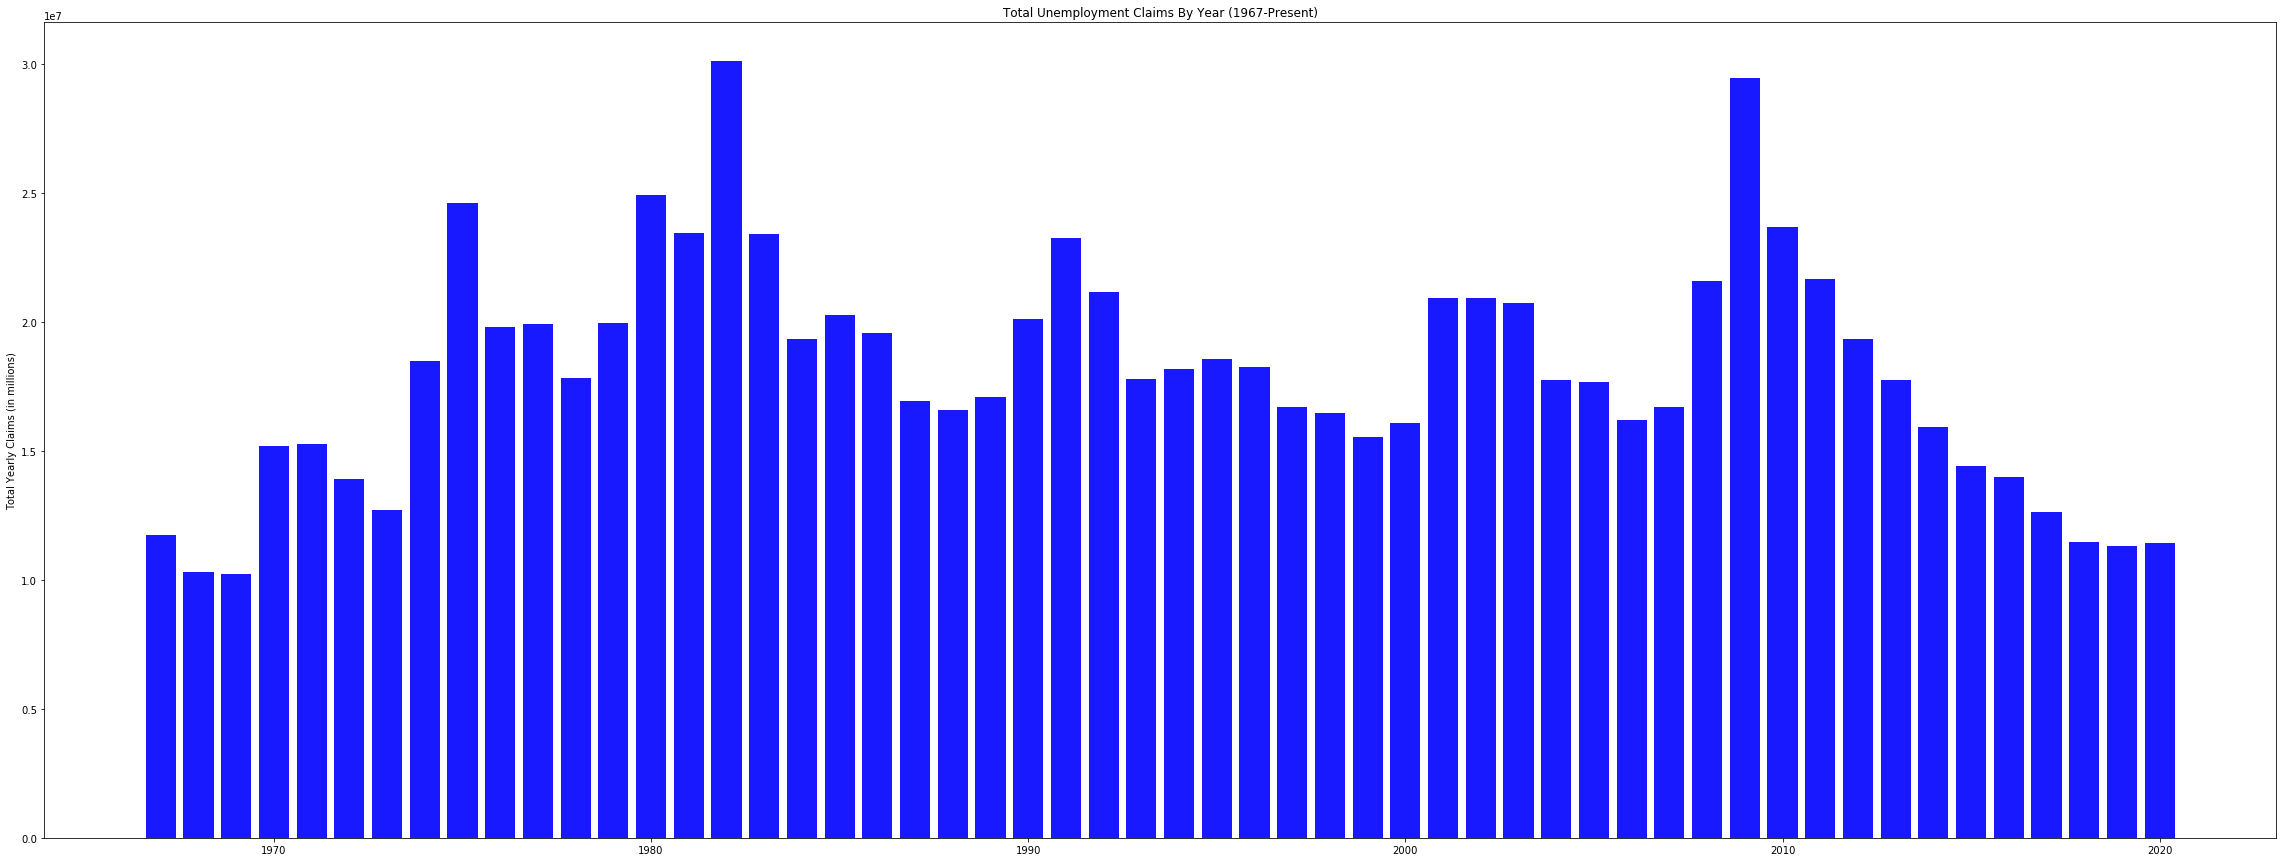

In [33]:
plt.figure(figsize=(40,15))
plt.bar(yearly_claims['Year'], yearly_claims['Claims'], color='blue', alpha=0.9)
plt.ylabel('Total Yearly Claims (in millions)')
plt.title('Total Unemployment Claims By Year (1967-Present)')
plt.savefig('output/yearly_claims.png')
plt.show()